# Artificial Neural Networks for Binary Classification Exercise

In this notebook we will build an ANN to predict whether customers will churn (indicated by the column `Churn`).


## Dataset
- **Source**: [Kaggle](https://www.kaggle.com/datasets/ahmedgaitani/customer-churn-prediction-dataset/data).
- **Variables of Interest**:
  - `Churn`
- As for the data card you should be able by now to figure the data out by your self :)

## Preprocessing Steps

1. **Dropping irrelevant columns**
2. **Encoding categorical variables**
3. **Data Splitting**

## Model Architecture

- **Input Layer**: Please specify here (the trainee should this this)
- **Hidden Layers**: Please specify here (the trainee should fill this)
- **Output Layer**: Please specify here (the trainee should fill this)

## Training

- **Optimizer**: Please specify here (the trainee should fill this)
- **Loss Function**: Please specify here (the trainee should fill this)
- **Metrics**: Please specify here (the trainee should fill this)
- **Epochs**: Please specify here (the trainee should fill this)
- **Batch Size**: Please specify here (the trainee should fill this)
- **Validation Split**: Please specify here (the trainee should fill this)

## Evaluation
- Please specify here (the trainee should fill this)

If you need to change the steps or add more please do so and explain why!

# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load Data and EDA

In [2]:
df=pd.read_csv("C:\Churn_Modelling_Exercise.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0296-XXXX,Female,1,No,Yes,61,No,Yes,DSL,No,...,Yes,No internet service,No,No,One year,Yes,Electronic check,42.52,2593.72,No
296,0297-XXXX,Female,0,No,No,49,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,22.31,1093.19,Yes
297,0298-XXXX,Male,0,No,Yes,71,Yes,Yes,DSL,No internet service,...,Yes,Yes,No,Yes,Two year,No,Mailed check,59.57,4229.47,Yes
298,0299-XXXX,Male,1,Yes,Yes,1,Yes,Yes,No,Yes,...,No internet service,No internet service,Yes,Yes,Two year,No,Credit card,31.32,31.32,No


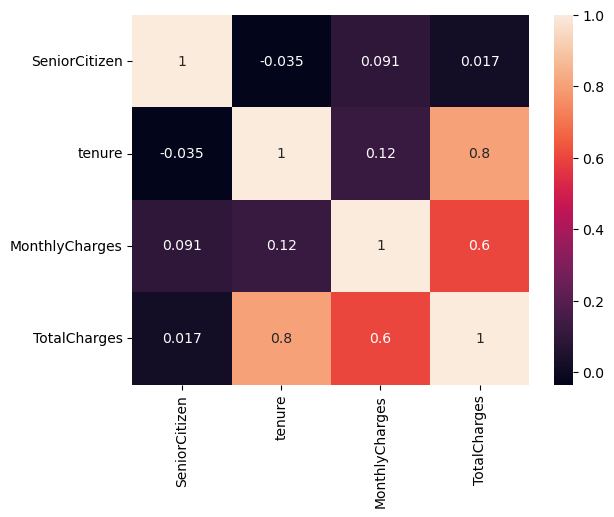

In [4]:
corr_matrix = df.corr()

sn.heatmap(corr_matrix, annot=True)
plt.show()

## Preprocessing

### Drop unnecessary columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

### One-hot-encoder and Label-encoder

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

## Selecting Features && Train Test Split

### Selecting Features

In [7]:
df = df.drop('customerID', axis=1)
df = df.drop('MultipleLines', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            300 non-null    int8   
 1   SeniorCitizen     300 non-null    int64  
 2   Partner           300 non-null    int8   
 3   Dependents        300 non-null    int8   
 4   tenure            300 non-null    int64  
 5   PhoneService      300 non-null    int8   
 6   InternetService   300 non-null    int8   
 7   OnlineSecurity    300 non-null    int8   
 8   OnlineBackup      300 non-null    int8   
 9   DeviceProtection  300 non-null    int8   
 10  TechSupport       300 non-null    int8   
 11  StreamingTV       300 non-null    int8   
 12  StreamingMovies   300 non-null    int8   
 13  Contract          300 non-null    int8   
 14  PaperlessBilling  300 non-null    int8   
 15  PaymentMethod     300 non-null    int8   
 16  MonthlyCharges    300 non-null    float64
 1

In [10]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Creating the sequential model

In [21]:
model = Sequential()

### Adding the input layer

In [22]:
model.add(Dense(units=X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

In [23]:
`

18

### Adding the hidden layers

In [24]:
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

### Adding the output layer

In [25]:

model.add(Dense(units=1, activation='sigmoid'))

### Compiling the model

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Display model summary

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                342       
                                                                 
 dense_5 (Dense)             (None, 6)                 114       
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


### Fitting the model

In [28]:
model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 2.0455 - accuracy: 0.4427 - val_loss: 1.0972 - val_accuracy: 0.5833
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9824 - accuracy: 0.4427 - val_loss: 0.7295 - val_accuracy: 0.6042
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7374 - accuracy: 0.4219 - val_loss: 0.6949 - val_accuracy: 0.5625
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4740 - val_loss: 0.6986 - val_accuracy: 0.3958
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5469 - val_loss: 0.6907 - val_accuracy: 0.4583
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5677 - val_loss: 0.7008 - val_accuracy: 0.3958
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5469 - val_loss: 0.7004 - val_accuracy: 0.3750
Epoch 8/100


## Evaluating the model

In [19]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.5667


[0.7051200866699219, 0.5666666626930237]